# Eigengene SVA Initial Pass

**Created**: 10 December 2021

## Environment

In [1]:
rm(list=ls())

if (!requireNamespace("circlize")) {
    install.packages("circlize")
}

Loading required namespace: circlize



In [2]:
library(tidyverse)
library(data.table)
library(circlize)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visua

## Load Data

In [3]:
geno <- fread("~/gains_team282/Genotyping/All_genotyping_merged_filtered_b38_refiltered_rsID.bim")
colnames(geno) <- c("chr", "snp", "cM", "pos", "minor", "major")

## Manhattan Plots

Under the null distribution, $t=\frac{\hat{\beta}}{SE}$ follows a T distribution with degrees of freedom close to $n$. The genomic inflation score measures the deviation from this expected distribution while accounting for outliers expected from a few true positives. The score is

$$\lambda = \frac{\text{median}(t^2)}{\text{median}(\chi_1^2)}$$

where $t$ is the T-statistic for $\beta$. Here, we assume that the T Distribution can be approximated as a standard normal distribution since $n$ is relatively large.

In [6]:
lambdas <- list()

for (file in list.files("~/gains_team282/nikhil/expression/eigengene_sva/initial_pass/", pattern="*.tsv")) {

    cat(file, " ")
    flush.console()
    file.full = paste0("~/gains_team282/nikhil/expression/eigengene_sva/initial_pass/", file)
    
    me.assoc = fread(file.full, sep="\t", fill=TRUE)
    colnames(me.assoc) <- c("snp", "beta", "se", "t", "p")

    lambda = median(qchisq(1 - me.assoc$p, 1)) / qchisq(0.5, 1)
    lambdas[[file]] = lambda

    if (sum(me.assoc$p < 1e-8, na.rm=TRUE) == 0) {
        next
    }

    me.assoc = merge(me.assoc, geno, by="snp")

    me.assoc.sig = me.assoc %>%
        dplyr::filter(!is.na(p)) %>%
        dplyr::filter(p < 0.05) %>%
        dplyr::mutate(chr=factor(chr, levels=1:23)) %>%
        dplyr::mutate(chr.type=ifelse(as.numeric(chr) %% 2 == 0, "Even", "Odd"))

    p <- me.assoc.sig %>%
        dplyr::mutate(Log.10.p = -log10(p)) %>%
        ggplot() +
        geom_point(aes(x=pos, y=Log.10.p, color=chr.type), size=I(0.5), alpha=0.5) +
        geom_hline(yintercept=-log10(1e-5), lty=2, color="orange") +
        geom_hline(yintercept=-log10(5e-8), lty=2, color="firebrick1") +
        scale_color_manual(values=c("Even" = "royalblue4", "Odd" = "royalblue1")) +
        facet_grid(~chr, scale="free_x", space="free_x") +
        guides(color="none") +
        xlab("Position") + ylab(expression('-log'[10]~'(p)')) +
        ggplot_theme +
        theme(
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank(),
            panel.spacing=unit(0.1, "lines")
        )
    ggsave(p, filename=paste0("04_Expression/results/manhattan_initial_pass/", gsub(".tsv", "", file), ".png"), width=14, height=5, dpi=600)
}

ME_1.tsv  ME_10.tsv  ME_100.tsv  ME_101.tsv  ME_102.tsv  ME_11.tsv  ME_12.tsv  ME_13.tsv  ME_14.tsv  ME_15.tsv  ME_16.tsv  ME_17.tsv  ME_18.tsv  ME_19.tsv  ME_2.tsv  ME_20.tsv  ME_21.tsv  ME_22.tsv  ME_23.tsv  ME_24.tsv  ME_25.tsv  ME_26.tsv  ME_27.tsv  ME_28.tsv  ME_29.tsv  ME_3.tsv  ME_30.tsv  ME_31.tsv  ME_32.tsv  ME_33.tsv  ME_34.tsv  ME_35.tsv  ME_36.tsv  ME_37.tsv  ME_38.tsv  ME_39.tsv  ME_4.tsv  ME_40.tsv  ME_41.tsv  ME_42.tsv  ME_43.tsv  ME_44.tsv  ME_45.tsv  ME_46.tsv  ME_47.tsv  ME_48.tsv  ME_49.tsv  ME_5.tsv  ME_50.tsv  ME_51.tsv  ME_52.tsv  ME_53.tsv  ME_54.tsv  ME_55.tsv  ME_56.tsv  ME_57.tsv  ME_58.tsv  ME_59.tsv  ME_6.tsv  ME_60.tsv  ME_61.tsv  ME_62.tsv  ME_63.tsv  ME_64.tsv  ME_65.tsv  ME_66.tsv  ME_67.tsv  ME_68.tsv  ME_69.tsv  ME_7.tsv  ME_70.tsv  ME_71.tsv  ME_72.tsv  ME_73.tsv  ME_74.tsv  ME_75.tsv  ME_76.tsv  ME_77.tsv  ME_78.tsv  ME_79.tsv  ME_8.tsv  ME_80.tsv  ME_81.tsv  ME_82.tsv  ME_83.tsv  ME_84.tsv  ME_85.tsv  ME_86.tsv  ME_87.tsv  ME_88.tsv  ME_89.tsv  ME_9

Plot the distribution of the genomic inflation factors for each module eigengene. These factors should be close to 1, indicating that most of the association tests follow the expected null distribution when no significant association is present.

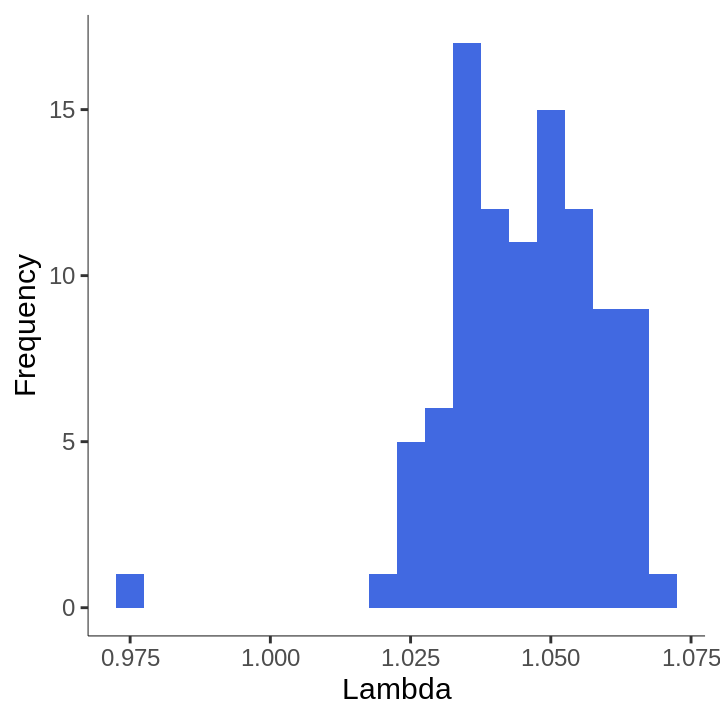

In [20]:
options(repr.plot.width=6, repr.plot.height=6)

as.data.frame(unlist(lambdas)) %>%
    dplyr::select(Lambda=1) %>%
    dplyr::filter(!is.na(Lambda)) %>%
    ggplot() +
    geom_histogram(aes(x=Lambda), fill="royalblue", binwidth=0.005) +
    ylab("Frequency") +
    ggplot_theme

ggsave("04_Expression/results/genomic_inflation_factor_initial_pass.svg", width=6, height=6)

## P-Value Q-Q Plots

Under the null hypothesis, we expect p-values for multiple tests to have a uniform distribution. If there is inflation in the data (that is, variants are associated with the quantitative variable due to population stratification), this p-value distribution will be skewed towards significance. This is quantified with the genomic inflation factor ($\lambda$). We can also plot the Q-Q plot for the p-values to check for deviation from the expected distribution. The p-values for true significant hits (close to 0) should deviate from the distribution, but the rest (indicating true negatives) should follow the distribution faithfully.

In [6]:
file <- "ME_95.tsv"
cat(file, "\n")
file.full <- paste0("~/gains_team282/nikhil/expression/eigengene_sva/initial_pass/", file)

me.assoc <- fread(file.full)
colnames(me.assoc) <- c("snp", "beta", "se", "t", "p")

ME_95.tsv 


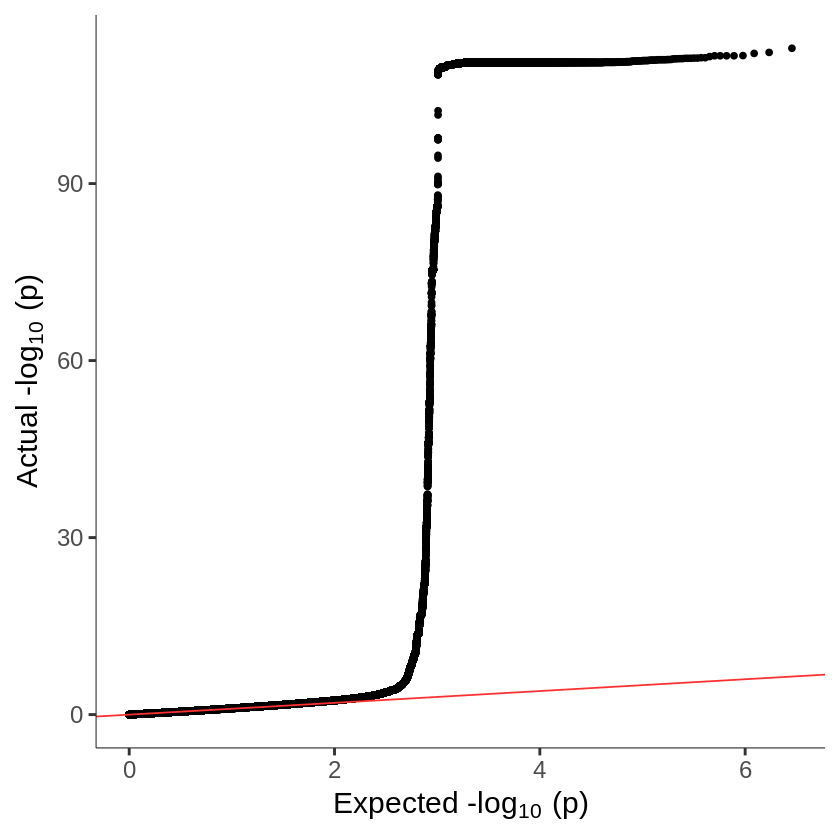

In [7]:
exp.p.assoc <- me.assoc %>%
    as.data.frame() %>%
    dplyr::mutate(expected.p=(rank(p, ties.method="first") + 0.5) / (length(p) + 1)) %>%
    dplyr::mutate(Log.10.P=-log10(p)) %>%
    dplyr::mutate(Expected.Log.10.P=-log10(expected.p))

dplyr::bind_rows(
    exp.p.assoc %>% dplyr::mutate(Expected.Log.10.P < 5) %>% dplyr::sample_frac(0.001),
    exp.p.assoc %>% dplyr::mutate(Expected.Log.10.P >= 5)
) %>%
    ggplot() +
    geom_point(aes(x=Expected.Log.10.P, y=Log.10.P)) +
    geom_abline(slope=1, intercept=0, color="firebrick1") +
    xlab(expression("Expected -log"[10]~"(p)")) +
    ylab(expression("Actual -log"[10]~"(p)")) +
    ggplot_theme